In [1]:
import pandas as pd                    ## Este proporciona una estructura similiar a los data.frame
import numpy as np
import statsmodels.api as sm           ## Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf  ## Permite ajustar modelos estadísticos utilizando fórmulas de estilo R
import matplotlib.pyplot as plt
import seaborn as sns

2). Leer la base de datos:

Para esto, se usará la función read_csv del paquete pandas.

In [2]:
dt = pd.read_csv("data.csv")

3). Estructura y primeras observaciones de la base de datos:

En este paso, se debe observar el conjunto de datos importados, con el fin de familiarizarse con las características esenciales de los datos.

In [3]:
dt.head()         # Sirve para mostrar la parte inicial de los datos
                  # dt.head(15) muestra las 15 primeras observaciones
                  # (Existen más funciones importantes y complementarias para ésto y ya las
                  # hemos revisado en clase. Si consideras necesario aplícalas)

,Obs,tiempo,cantidad,distancia
0,1,16.68,7,560
1,2,11.50,3,220
2,3,12.03,3,340
3,4,14.88,4,80
4,5,13.75,6,150


In [4]:
dt.describe()

,Obs,tiempo,cantidad,distancia
count,25.000000,25.000000,25.000000,25.000000
mean,13.000000,22.384000,8.760000,409.280000
std,7.359801,15.524903,6.881618,325.188089
min,1.000000,8.000000,2.000000,36.000000
25%,7.000000,13.750000,4.000000,150.000000
50%,13.000000,18.110000,7.000000,330.000000
75%,19.000000,21.500000,10.000000,605.000000
max,25.000000,79.240000,30.000000,1460.000000


In [5]:
dt=dt.drop(columns=["Obs"])
dt.head()

,tiempo,cantidad,distancia
0,16.68,7,560
1,11.50,3,220
2,12.03,3,340
3,14.88,4,80
4,13.75,6,150


4). Diagrama de dispersión:

Éste gráfico ayuda a analizar la forma en la que variables están relacionadas.

<Figure size 768x576 with 0 Axes>

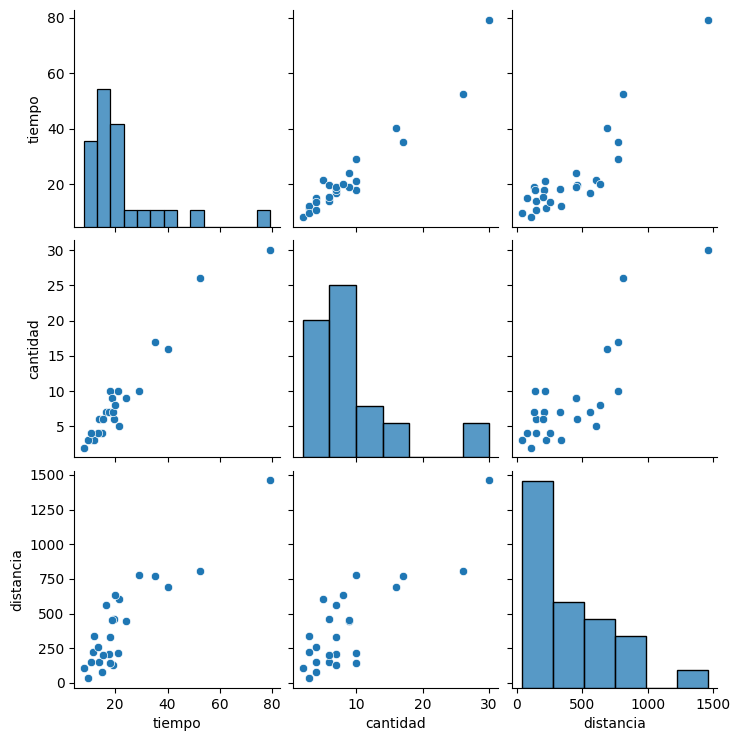

In [6]:
# Crear un pairplot del dataset
plt.figure(dpi=120) # resolution
sns.pairplot(dt) # genera una matriz con plots de dispersion
plt.show()

Ahora en 3D

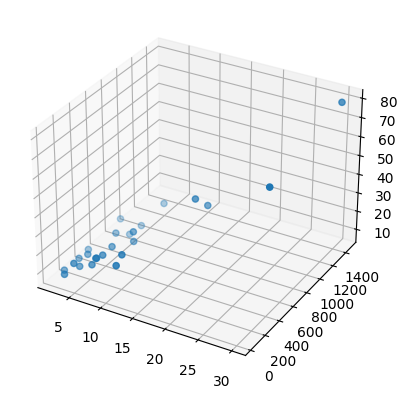

In [7]:
from matplotlib import pyplot             # Permite la generación de gráficos
from mpl_toolkits.mplot3d import Axes3D   # Permite agregar eje tridimensionales
import random                             # Permiten obtener de distintos modos números aleatorios

fig = plt.figure()       # Ajustes del gráfico
ax = plt.axes(projection='3d')


x1 = dt["cantidad"]                             # Datos eje X
x2 = dt["distancia"]                             # Datos eje Y
y = dt["tiempo"]                               # Datos eje Z (Var. Respuesta)

ax.scatter3D(x1, x2, y, 'blue')


5). Ajustar el modelo de regresión mediante fórmulas:

Para ésto, se usa statsmodels.api.

In [8]:
mod = smf.ols('y ~ x1 + x2', data=dt).fit()  # Ajusta el modelo lineal definido usando el dataframe proporcionado
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     261.2
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           4.69e-16
Time:                        01:26:26   Log-Likelihood:                -63.415
No. Observations:                  25   AIC:                             132.8
Df Residuals:                      22   BIC:                             136.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3412      1.097      2.135      0.0

6. Extraer los estimados

In [20]:
mod.params

Intercept    2.341231
x1           1.615907
x2           0.014385
dtype: float64

7. Obtener las predicciones

In [10]:
xs = dt[['cantidad','distancia']]
predicciones=mod.predict(xs)
predicciones

0     21.708084
1     10.353615
2     12.079794
3      9.955646
4     14.194398
5     18.399574
6      7.155376
7     16.673395
8     71.820294
9     19.123587
10    38.092507
11    21.593041
12    12.472991
13    18.682464
14    23.328798
15    29.662928
16    14.913640
17    15.551379
18     7.706807
19    40.887970
20    20.514179
21    56.006528
22    23.357568
23    24.402854
24    10.962584
dtype: float64

Otra forma de hacerlo

In [29]:
from sklearn import linear_model
X = dt[['cantidad', 'distancia']].values.reshape(-1,2)
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
print (model.score(X,y))
print (model.coef_)
print (model.intercept_)
print (model.predict(X))

0.9595937494832257
[1.61590721 0.01438483]
2.3412311451922108
[21.70808432 10.35361455 12.0797937   9.95564609 14.19439835 18.39957428
  7.15537645 16.67339513 71.8202938  19.12358708 38.09250698 21.5930409
 12.47299068 18.68246414 23.3287982  29.66292843 14.91363966 15.55137869
  7.70680652 40.88796994 20.51417893 56.00652789 23.35756786 24.4028535
 10.96258393]
